# Training Linear Models

1. Linear Regression
 + The Normal Equation (the first way to train linear regression model)
 + Computational Complexity
2. Gradient Descent (the second way)
 + Batch Gradient Descent
 + Stochastic Gradient Descent
 + Mini-batch Gradient Descent
3. Polynomial Regression (can fit non-linear datasets)
4. Learning Curve (detect whether or not overfitting)
5. Regularized Linear Models (reduce the risk of overfitting the training set)
 + Ridge Regression
 + Lasso Regression
 + Elastic Regression
 + Early Stopping
6. Logistic Regression (commonly used for classification)
 + Estimating Probabilities
 + Training and Cost Function
 + Decision Boundaries
 + Softmax Regression

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
%matplotlib inline

## 1 Linear Regression

More generally, a <font color='red'>linear model</font> makes a prediction by simply computing a weighted sum of the input features, plus a constant called the **bias term** (also called the **intercept term**).

Equation 1: Linear Regression model prediction
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$

Equation 2: Linear Regression model prediction (vectorized form)
$$\hat{y} = h_{\theta}(\bf x)= {\theta}^T \cdot {\bf x}$$

### 1.1 The Normal Equation

Equation 3: Normal Equation
$$\hat{\theta} = ({\bf X}^T \cdot {\bf X})^{-1} \cdot {\bf X}^T \cdot y$$

Generate some linear-looking data.

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [7]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [6]:
y

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842],
       [ 5.03890908],
       [10.14821022],
       [ 8.46489564],
       [ 5.7873021 ],
       [ 5.18802735],
       [ 6.06907205],
       [ 5.12340036],
       [ 6.82087644],
       [ 6.19956196],
       [ 4.28385989],
       [ 7.96723765],
       [ 5.09801844],
       [ 5.75798135],
       [ 5.96358393],
       [ 5.32104916],
       [ 8.29041045],
       [ 4.85532818],
       [ 6.28312936],
       [ 7.3932017 ],
       [ 4.68275333],
       [ 9.53145501],
       [ 5.19772255],
       [ 4.64785995],
       [ 9.61886731],
       [ 7.87502098],
       [ 8.82387021],
       [ 5.88791282],
       [ 7.0492748 ],
       [ 7.91303719],
       [ 6.9424623 ],
       [ 4.69751764],
       [ 5.80238342],
       [ 5.34915394],
       [10.20785545],
       [ 6.34371184],
       [ 7

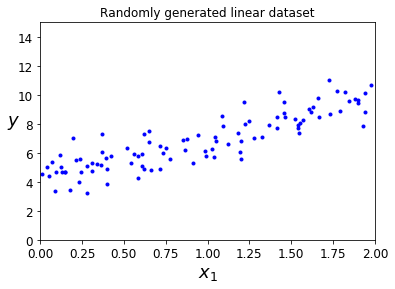

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([0, 2, 0, 15])
plt.title("Randomly generated linear dataset")
plt.show()

In [11]:
# Add x0=1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

Make predictions using $\hat{\theta}$:

In [13]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [14]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Plot this model's predicitons:

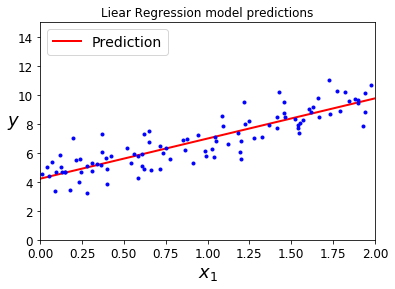

In [17]:
plt.plot(X_new, y_predict, "r-", label="Prediction", linewidth=2)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.title("Liear Regression model predictions")
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lin_reg.coef_

array([[2.77011339]])

In [20]:
lin_reg.intercept_

array([4.21509616])

In [21]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
The 